In [48]:
import matplotlib.pyplot as pl
import numpy as np
import matplotlib.animation as animation
from collections import deque

# Task A

In [ ]:
def func(t,y):
    f = -2*y*t - 2*t**3
    return f

In [ ]:
# Forward Euler
def FwEuler(t0,y0,h,tend):
    # compose nodal times
    t = np.arange(t0,tend+h,h)
    # determine the number of time steps
    N = len(t)
    # allocate output array
    y = np.ndarray(N)
    # initialise the solution
    t[0] = t0
    y[0] = y0
    # compute the solution incrementally at subsequent time steps
    for n in range(1,N):
        y[n] = y[n-1] + func(t[n-1],y[n-1]) * h
    return (t,y)


In [ ]:
# Runge-Kutta
def ODERK4(t0,y0,h,tend):
    # compose nodal times
    t = np.arange(t0,tend+h,h)
    # determine the number of time steps
    N = len(t)
    # allocate output array
    y = np.ndarray(N)
    # initialise the solution
    t[0] = t0
    y[0] = y0
    # compute the solution incrementally at subsequent time steps
    for n in range(1,N):
        k1 = h * func(t[n-1],y[n-1])
        k2 = h * func(t[n-1]+0.5*h,y[n-1]+0.5*k1)
        k3 = h * func(t[n-1]+0.5*h,y[n-1]+0.5*k2)
        k4 = h * func(t[n-1]+h,y[n-1]+k3)
        y[n] = y[n-1] + 1/6*(k1+2*k2+2*k3+k4)
    return (t,y)


# Task B

In [ ]:
# Backward Euler
def BwEuler(t0,y0,h,tend):
    # compose nodal times
    t = np.arange(t0,tend+h,h)
    # determine the number of time steps
    N = len(t)
    # allocate output array
    y = np.ndarray(N)
    # initialise the solution
    t[0] = t0
    y[0] = y0
    # compute the solution incrementally at subsequent time steps, for specified ODE
    for n in range(1,N):
        y[n] = (y[n-1] - 2*h*t[n]**3) / (1 + 2*h*t[n])
    return (t,y)

In [ ]:
# test the methods (FW Eu, RK4, BW Eu, Analytical)
# set step, initial condition, final tend of marching computation
h = 0.1
y0 = 1000
t0 = 0
tend = 10
# apply various methods
(t,y) = FwEuler(t0,y0,h,tend)
pl.plot(t,y)
(t,y) = ODERK4(t0,y0,h,tend)
pl.plot(t,y)
(t,y) = BwEuler(t0,y0,h,tend)
pl.plot(t,y)
# analytical solution
yan = 1-t**2+(y0-1)*np.exp(-t**2)
pl.plot(t,yan)
pl.legend(['FW E','RK4','BW E','An'])
pl.grid()
pl.show()

# Task C

In [31]:
def funcN(t,y):
    f = np.ndarray(len(y))
    
    # Copy and paste here one the section below <-------------------------------------------
    
    # Task D3: double pendulum
    L1 = 1; L2 = 0.5
    m1 = 1; m2 = 1
    g = 9.81
    
    s1 = np.sin(y[0]) # sin(theta1)
    c1 = np.cos(y[0]) # cos(theta1)
    s2 = np.sin(y[2]) # sin(theta2)
    c2 = np.cos(y[2]) # cos(theta2)
    t12 = y[0] - y[2] # theta1 - theta2
    s12 = np.sin(t12) # sin(theta1 - theta2)
    c12 = np.cos(t12) # cos(theta1 - theta2)
    
    f[0] = y[1]
    f[1] = (m2*g*s2*c12-m2*s12*(L1*y[1]**2*c12+L2*y[3]**2)-(m1+m2)*g*s1) / (L1*(m1+m2*s12**2))
    f[2] = y[3]
    f[3] = ((m1+m2)*(L1*y[1]**2*s12+g*s1*c12-g*s2)+m2*L2*y[3]**2*s12*c12) / (L2*(m1+m2*s12**2))
    

    return f

In [ ]:
# one of these sections needs to be copied and pasted in the above function funcN() 
# before running a task from C & D
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

    # Task C1: Covid-19 model
    a = 0 # transmission rate
    b = 0.05 # removal rate
    f[0] = -a*y[0]*y[1]
    f[1] = a*y[0]*y[1]-b*y[1]
    f[2] = b*y[1]
    
    
    # Task C2: House market
    f[0] = 0.3*y[0]*y[1]-0.8*y[0]
    f[1] = 1.1*y[1] - y[0]*y[1]
    
    
    # Task D1: pendulum
    c = 0.05 # dry place
    #c = 0.18 # humid envronment
    L = 1
    m = 0.5
    g = 9.81
    f[0] = y[1]
    f[1] = -c/m * y[1] - g/L * np.sin(y[0])
    
    
    # Task D2: coupled spring-mass systems
    k1 = 1; k2 = 1; k3 = 1; k4 = 1
    L1 = 1; L2 = 1; L3 = 1
    m1 = 1; m2 = 1; m3 = 1
    f[0] = y[1]
    f[1] = (-k1*(y[0]-L1) + k2*(y[2]-y[0]-L2)) / m1
    f[2] = y[3]
    f[3] = (-k2*(y[2]-y[0]-L2) + k3*(y[4]-y[2]-L3)) / m2
    f[4] = y[5]
    f[5] = (-k3*(y[4]-y[2]-L3) + k4*(L1+L2+L3-y[4])) / m3


    # Task D3: double pendulum
    L1 = 1; L2 = 0.5
    m1 = 1; m2 = 1
    g = 9.81
    
    s1 = np.sin(y[0]) # sin(theta1)
    c1 = np.cos(y[0]) # cos(theta1)
    s2 = np.sin(y[2]) # sin(theta2)
    c2 = np.cos(y[2]) # cos(theta2)
    t12 = y[0] - y[2] # theta1 - theta2
    s12 = np.sin(t12) # sin(theta1 - theta2)
    c12 = np.cos(t12) # cos(theta1 - theta2)
    
    f[0] = y[1]
    f[1] = (m2*g*s2*c12-m2*s12*(L1*y[1]**2*c12+L2*y[3]**2)-(m1+m2)*g*s1) / (L1*(m1+m2*s12**2))
    f[2] = y[3]
    f[3] = ((m1+m2)*(L1*y[1]**2*s12+g*s1*c12-g*s2)+m2*L2*y[3]**2*s12*c12) / (L2*(m1+m2*s12**2))

In [5]:
# System of N ODEs with Forward Euler
def FwEulerN(Y0,t0,tend,h):
    # determine the number of equations, i.e. variables
    Nv = len(Y0)
    # compose nodal times
    t = np.arange(t0,tend+h,h)
    # determine the number of time steps
    Nt = len(t)
    # allocate output array
    Y = np.ndarray((Nv,Nt))
    # initialise the solutions
    t[0] = t0
    Y[:,0] = Y0
    # compute the solution incrementally at subsequent time steps
    for it in range(1,Nt):
        f = funcN(t[it-1],Y[:,it-1])
        for iv in range(0,Nv):
            Y[iv,it] = Y[iv,it-1] + f[iv] * h
    return (t,Y)

In [ ]:
# Task C1: Covid-19 model

# before running this sextion:                    <---------------------------------
# set the equations for task C1 in function funcN <---------------------------------

# the variables are S, I and R
# represented by array Y, of dimension 3x1
# Y[0] represents S - susceptible individuals
# Y[1] represents I - infected individuals
# Y[2] represents R - removed individuals

# set the initial coditions Y(t=0) in array Y0
Y0 = np.ndarray(3)
Y0[0] = 500 # initial number of susceptible individuals
Y0[1] = 10 # initial number of infected individuals
Y0[2] = 0 # initial number of removed individuals

(t,Y) = FwEulerN(Y0,0,100,0.05)
pl.plot(t,Y[0,:])
pl.plot(t,Y[1,:])
pl.plot(t,Y[2,:])
pl.legend(['S','I','R'])
pl.grid()
pl.show()



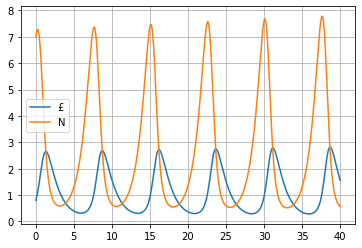

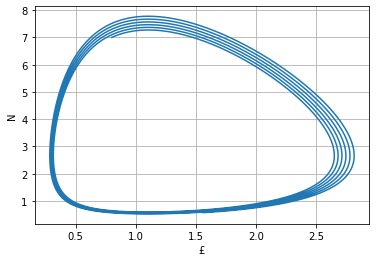

In [8]:
# Task C2: Financial model of the house market in London

# before running this sextion:                    <---------------------------------
# set the equations for task C2 in function funcN <---------------------------------

# the variables are £ and P
# represented by array Y, of dimension 2x1
# Y[0] represents £ - house price (in 100k)
# Y[1] represents P - number of houses sold (in thousands)

# set the initial coditions Y(t=0) in array Y0
Y0 = np.ndarray(2)
Y0[0] = 0.8 # initial house price (in 100k)
Y0[1] = 7 # initial number of houses sold (in thousands)

(t,Y) = FwEulerN(Y0,0,40,0.005)
pl.plot(t,Y[0,:])
pl.plot(t,Y[1,:])
pl.legend(['£','N'])
pl.grid()
pl.show()

pl.plot(Y[0,:],Y[1,:])
pl.xlabel('£')
pl.ylabel('N')
pl.grid()
pl.show()


# Task D

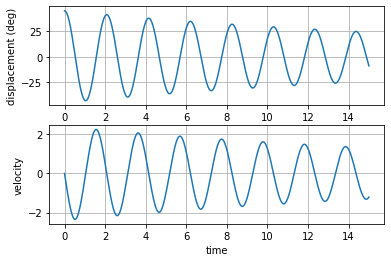

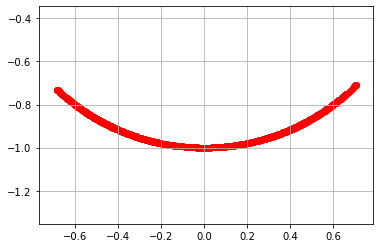

In [26]:
# Task D1: Damped non-linear motion of a pendulum

# before running this sextion:                    <---------------------------------
# set the equations for task D1 in function funcN <---------------------------------

# rewrite the 2nd order ODEs into a system of two first order ODEs
# dtheta / dt = w1
# dw1 / dt = -c/m * w1 - g/L * np.sin(theta)

# the variables are theta and w1
# represented by array Y, of dimension 2x1
# Y[0] represents theta (displacement)
# Y[1] represents w1 (velocity)

# set the initial coditions Y(t=0) in array Y0
Y0 = np.ndarray(2)
Y0[0] = np.pi/4 # initial angle displacement
Y0[1] = 0  # initial velocity = 0 (system at rest at the beginning)

# remember to set F1 and F2 in func1 and func2
(t,Y) = FwEulerN(Y0,0,15,0.002)

pl.subplot(2,1,1)
pl.plot(t,Y[0,:]*180/np.pi)
pl.xlabel('time')
pl.ylabel('displacement (deg)')
pl.grid()
pl.subplot(2,1,2)
pl.plot(t,Y[1,:])
pl.xlabel('time')
pl.ylabel('velocity')
pl.grid()
pl.show()

L1 = 1
for i in range(0,len(t),10):
    pl.scatter(L1*np.sin(Y[0,i]),-L1*np.cos(Y[0,i]),c='red')
pl.grid()
pl.axis('equal')
pl.show()                      


In [ ]:
# Task D2: Coupled spring-mass systems

# before running this sextion:                    <---------------------------------
# set the equations for task D2 in function funcN <---------------------------------

# rewrite the three 2nd order ODEs into a system of six first order ODEs
# dx1 / dt = w1
# dw1 / dt = d2 x1 / dt2 = (-k1*(x1-L1) + k2*(x2-x1-L2)) / m1
# dx2 / dt = w2
# dw2 / dt = d2 x2 / dt2 = (-k2*(x2-x1-L2) + k3*(x3-x2-L3)) / m2
# dx3 / dt = w3
# dw3 / dt = d2 x3 / dt2 = (-k3*(x3-x2-L3) + k4*(L1+L2+L3-x3)) / m3

# the variables are x1, x2, x3, w1, w2, w3
# represented by array Y, of dimension 6x1
# Y[0] represents x1
# Y[1] represents w1
# Y[2] represents x2
# Y[3] represents w2
# Y[4] represents x3
# Y[5] represents w3

# set the initial coditions
Y0 = np.ndarray(6)
Y0[0] = 0.5 # initial position of mass 1
Y0[1] = 0 # inital velocity of mass 1
Y0[2] = 1.5 # initial position of mass 2
Y0[3] = 0 # inital velocity of mass 2
Y0[4] = 2.5 # initial position of mass 3
Y0[5] = 0 # inital velocity of mass 3

(t,Y) = FwEulerN(Y0,0,50,0.002)
pl.plot(t,Y[0,:])
pl.plot(t,Y[2,:])
pl.plot(t,Y[4,:])
pl.legend(['x1','x2','x3'])
pl.grid()
pl.show()


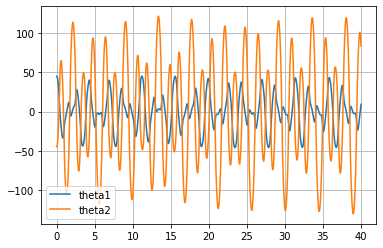

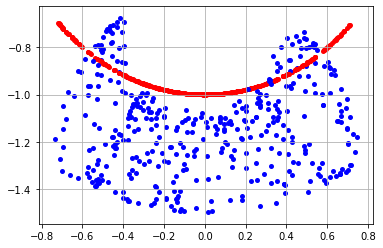

In [58]:
# Task D3: Double pendulum

# before running this sextion:                    <---------------------------------
# set the equations for task D3 in function funcN <---------------------------------

# rewrite the two 2nd order ODEs into a system of fourfirst order ODEs
# dtheta1 / dt = w1
# dw1 / dt = d2 theta1 / dt2 = ....
# dtheta2 / dt = w2
# dw2 / dt = d2 theta2 / dt2 = ....

# the variables are theta1, theta2, w1, w2
# represented by array Y, of dimension 6x1
# Y[0] represents theta1
# Y[1] represents w1
# Y[2] represents theta2
# Y[3] represents w2


# set the initial coditions
Y0 = np.ndarray(4)
Y0[0] = np.pi/4 # initial angle displacement of theta1
Y0[1] = 0 # initial velocity of mass 1
Y0[2] = -np.pi/4  # initial angle displacement of theta2
Y0[3] = 0  # initial velocity of mass 2


(t,Y) = FwEulerN(Y0,0,40,0.0002)
pl.plot(t,Y[0,:]*180/np.pi)
pl.plot(t,Y[2,:]*180/np.pi)
pl.legend(['theta1','theta2'])
pl.grid()
pl.show()


L1 = 1; L2 = 0.5
for i in range(0,len(t),500):
    x1 = L1*np.sin(Y[0,i]); y1 = -L1*np.cos(Y[0,i])
    pl.scatter(x1,y1,c='red',marker='.',linewidths=2)
    x2 = x1+L2*np.sin(Y[2,i]); y2 = y1-L2*np.cos(Y[2,i])
    pl.scatter(x2,y2,c='blue',marker='.',linewidths=2)
pl.grid()
pl.show()


